<a href="https://colab.research.google.com/github/ShubhamZoro/Movie_recomendation/blob/main/Movie_Recommendation_collaborative_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
movie=pd.read_csv("movie.csv")

In [4]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
rating=pd.read_csv("rating.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [8]:
movie.drop('genres',axis=1,inplace=True)

In [9]:
movie.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [10]:
df=pd.merge(movie,rating,on='movieId')

In [11]:
df.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),11,4.5,2009-01-02 01:13:41


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [15]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Under Capricorn (1949)                        5.0
Pride and the Passion, The (1957)             5.0
Submarino (2010)                              5.0
Dirty Carnival, A (Biyeolhan geori) (2006)    5.0
Diamond Men (2001)                            5.0
Name: rating, dtype: float64

In [16]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 867
Forrest Gump (1994)                 850
Silence of the Lambs, The (1991)    802
Shawshank Redemption, The (1994)    790
Jurassic Park (1993)                759
Name: rating, dtype: int64

In [17]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Hellboy': The Seeds of Creation (2004),3.000
'Neath the Arizona Skies (1934),3.500
'Round Midnight (1986),4.000
'Salem's Lot (2004),3.000
'Til There Was You (1997),2.125


In [19]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Hellboy': The Seeds of Creation (2004),3.000,2
'Neath the Arizona Skies (1934),3.500,1
'Round Midnight (1986),4.000,2
'Salem's Lot (2004),3.000,3
'Til There Was You (1997),2.125,8


<Axes: >

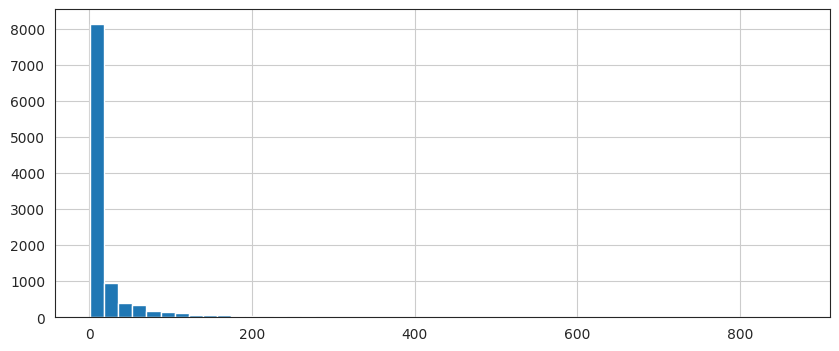

In [31]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=50)

In [27]:
ratings[ratings['num of ratings']>30]

,rating,num of ratings
title,,
"'burbs, The (1989)",3.090909,44
(500) Days of Summer (2009),3.821429,70
10 Things I Hate About You (1999),3.335938,128
101 Dalmatians (1996),2.995000,100
101 Dalmatians (One Hundred and One Dalmatians) (1961),3.225490,102
...,...,...
Zombieland (2009),3.727273,55
Zoolander (2001),3.216495,97
eXistenZ (1999),3.385714,70


<Axes: >

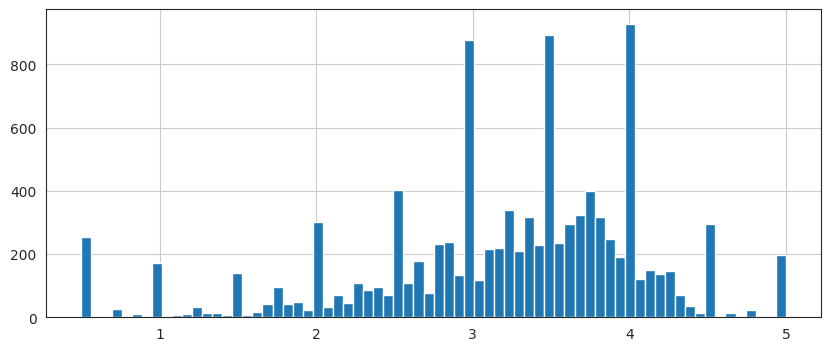

In [33]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

<Axes: xlabel='rating', ylabel='Density'>

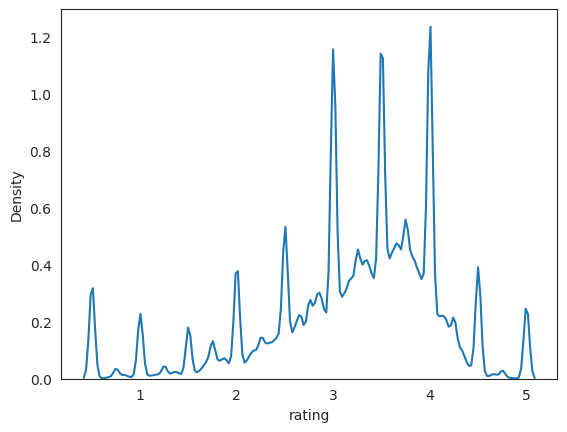

In [34]:
sns.kdeplot(data=ratings, x="rating", bw_adjust=.2)

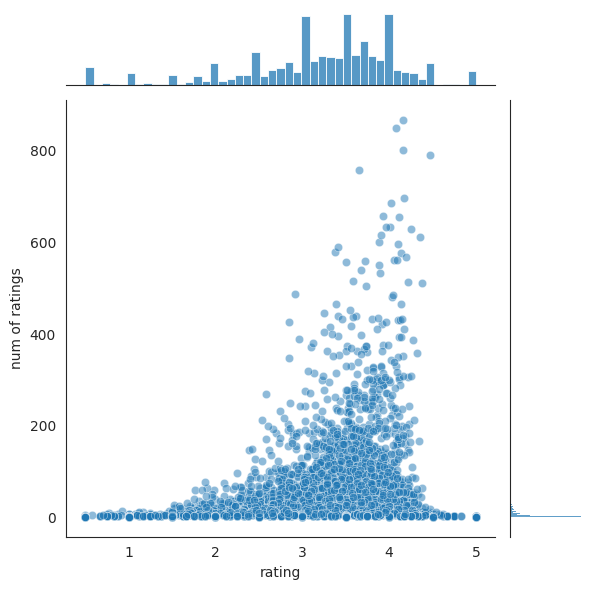

In [35]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Recommending movie

In [43]:
moviemat=df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),...,Zulu (1964),Zulu Dawn (1979),Zus & Zo (2001),[REC] (2007),"\\""Great Performances\""\"" Cats (1998)""",eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Pulp Fiction (1994),4.159746,867
Forrest Gump (1994),4.077647,850
"Silence of the Lambs, The (1991)",4.156484,802
"Shawshank Redemption, The (1994)",4.474684,790
Jurassic Park (1993),3.651515,759
Star Wars: Episode IV - A New Hope (1977),4.166428,697
Braveheart (1995),4.019651,687
Terminator 2: Judgment Day (1991),3.928463,657
"Matrix, The (1999)",4.115267,655


In [48]:
starwars_user_ratings = moviemat['Star Wars: Episode IV - A New Hope (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

userId
1    4.0
2    5.0
3    5.0
4    NaN
5    5.0
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

In [49]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [50]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Hellboy': The Seeds of Creation (2004),-1.000000
'Salem's Lot (2004),1.000000
'Til There Was You (1997),0.000000
"'burbs, The (1989)",0.010066
'night Mother (1986),-0.485662


In [51]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Tarantula (1955),1.0
"Independent, The (2000)",1.0
Invaders from Mars (1953),1.0
Asterix & Obelix vs. Caesar (Astérix et Obélix contre César) (1999),1.0
"Bird with the Crystal Plumage, The (Uccello dalle piume di cristallo, L') (1970)",1.0
Hatari! (1962),1.0
"He Said, She Said (1991)",1.0
Street Fighter II: The Animated Movie (Sutorîto Faitâ II gekijô-ban) (1994),1.0
Shiloh (1997),1.0


In [52]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Hellboy': The Seeds of Creation (2004),-1.000000,2
'Salem's Lot (2004),1.000000,3
'Til There Was You (1997),0.000000,8
"'burbs, The (1989)",0.010066,44
'night Mother (1986),-0.485662,6


In [53]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars: Episode IV - A New Hope (1977),1.000000,697
Star Wars: Episode V - The Empire Strikes Back (1980),0.754597,597
Star Wars: Episode VI - Return of the Jedi (1983),0.721450,617
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),0.510734,569
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.481984,204


In [54]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,208
Disclosure (1994),0.774043,156
Ace Ventura: When Nature Calls (1995),0.642933,269
Wallace & Gromit: A Close Shave (1995),0.633395,142
Bruce Almighty (2003),0.621281,107
